In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'white') #white backgrond for seaborn plots
sns.set(style = 'whitegrid', color_codes = True)


from sklearn.model_selection import train_test_split
import sklearn.metrics

from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.simplefilter(action = 'ignore')

# 1. Read the column description and ensure you understand each attribute well

In [2]:
raw_df = pd.read_csv('E:\Joydeep\AI-ML\GL\Week 4 - Supervised Learning\Assignment\Bank_Personal_Loan_Modelling.csv')
raw_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


1. ID : Customer ID
2. Age : Customer's age in completed years
3. Experience : #years of professional experience
4. Income : Annual income of the customer(000)
5. ZIP Code : Home Address ZIP code
6. Family : Family size of the customer
7. CCAvg : Avg. spending on credit cards per month(000)
8. Education : Education Level.
    1. Undergrad 
    2. Graduate 
    3. Advanced/Professional
9. Mortgage : Value of house mortgage if any(000)
10. Personal Loan : Did this customer accept the personal loan offered in the last campaign?
11. Securities Account : Does the customer have a securities account with the bank?
12. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
13. Online : Does the customer use internet banking facilities?
14. Credit card : Does the customer use a credit card issued by UniversalBank?

In [3]:
#dropping customer id as this is not a feature
raw_df.drop('ID', axis = 1, inplace = True)
raw_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Checking the dataframe dimension
raw_df.shape

(5000, 13)

In [5]:
#Checking for datatypes
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [6]:
#Checking for null values
raw_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### - There are no null values in the data set

# 2. Study the data distribution in each attribute, share your findings

In [7]:
#Checking for the basic distribution of the features
profile = round(raw_df.describe(),2)
profile.loc['Variance'] = round(raw_df.var(),2).tolist()
profile.loc['Skew'] = round(raw_df.skew(),2).tolist()
profile.transpose()

,count,mean,std,min,25%,50%,75%,max,Variance,Skew
Age,5000.0,45.34,11.46,23.0,35.0,45.0,55.0,67.0,131.40,-0.03
Experience,5000.0,20.10,11.47,-3.0,10.0,20.0,30.0,43.0,131.51,-0.03
Income,5000.0,73.77,46.03,8.0,39.0,64.0,98.0,224.0,2119.10,0.84
ZIP Code,5000.0,93152.50,2121.85,9307.0,91911.0,93437.0,94608.0,96651.0,4502256.75,-12.50
Family,5000.0,2.40,1.15,1.0,1.0,2.0,3.0,4.0,1.32,0.16
CCAvg,5000.0,1.94,1.75,0.0,0.7,1.5,2.5,10.0,3.05,1.60
Education,5000.0,1.88,0.84,1.0,1.0,2.0,3.0,3.0,0.71,0.23
Mortgage,5000.0,56.50,101.71,0.0,0.0,0.0,101.0,635.0,10345.70,2.10
Personal Loan,5000.0,0.10,0.29,0.0,0.0,0.0,0.0,1.0,0.09,2.74
Securities Account,5000.0,0.10,0.31,0.0,0.0,0.0,0.0,1.0,0.09,2.59


## Inferences
1. All attributes are numeric data types but 
2. Numeric continuous data : Age, Experience, Income, ZIP Code, CCAvg, Mortgage 
3. Categorical data : Education & Income 
4. Boolean data :Securities Account, CD Account, Online & Credit Card

5. Age & Experience are fairly symmetrical with low skewness but Experience has some negative values which have to be cleaned
6. Income & CCAvg are positively skewed 
7. Mortgage is highly positively skewed

In [8]:
#Replacing Education values with their labels
mod_df = raw_df.copy()
mod_df.Education.replace([1,2,3],['Undergrad','Graduate','Professional'], inplace = True)

print(mod_df['Education'].dtype)
mod_df.groupby('Education').size().reset_index(name='Counts')

object


,Education,Counts
0,Graduate,1403
1,Professional,1501
2,Undergrad,2096


In [9]:
mod_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,Graduate,0,0,0,0,0,1


In [10]:
# Replacing negative experiences with their age means
for i in mod_df.index:
    if mod_df['Experience'][i] < 0:
        rep_exp = mod_df[mod_df['Age'] == mod_df['Age'][i]]['Experience'].mean()
        rep_exp = round(max(rep_exp,0))
        mod_df['Experience'][i] = rep_exp
    

In [11]:
mod_df['Experience'].describe()

count    5000.000000
mean       20.122800
std        11.435361
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

#### There are no neagtive values in Experience any more

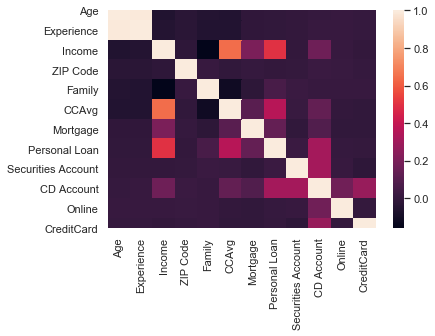

In [12]:
# Checking relationships between features
corr = mod_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

### Inferences

1. Age and Experience are highly correlated
2. Other features with positive correlation are 
    1. Income & CCAvg 
    2. Income & Personal loan 

In [13]:
#Removing outliers from Mortgage : z-scores > 3 are considered outliers

from scipy import stats
mod_df['mz'] = np.abs(stats.zscore(mod_df['Mortgage']))
mod_df = mod_df[mod_df['mz'] <= 3]
mod_df.drop('mz', axis = 1, inplace = True)

mod_df.shape

(4895, 13)

# 3. Get the target column distribution. Your comments

In [14]:
# Checking the spread of y variable : Personal loan
mod_df.groupby('Personal Loan').size().reset_index(name='Counts')

,Personal Loan,Counts
0,0,4462
1,1,433


### It's an unbalanced data set with number of loan takers quite small

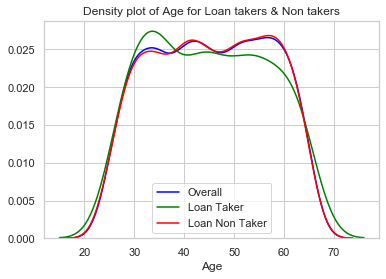

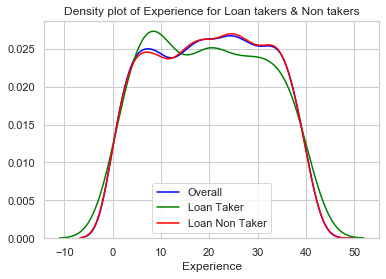

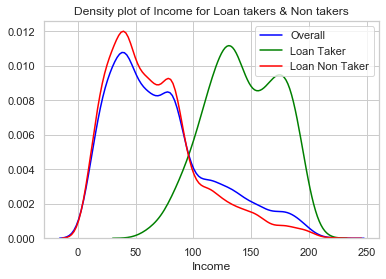

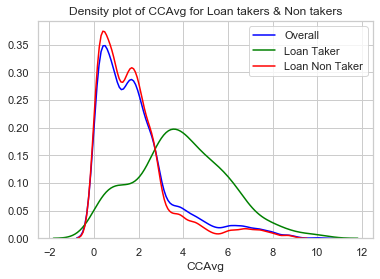

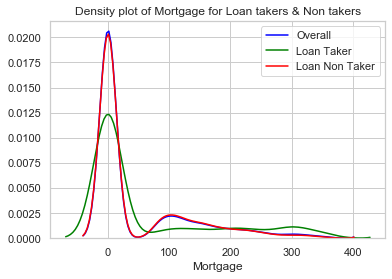

In [15]:
continuous_cols = ['Age','Experience','Income','CCAvg','Mortgage']
for i in continuous_cols:
    ax = plt.subplot()
    sns.kdeplot(mod_df[i], color = 'Blue', label = 'Overall')
    sns.kdeplot(mod_df[i][mod_df['Personal Loan'] == 1], color = 'Green', label = 'Loan Taker')
    sns.kdeplot(mod_df[i][mod_df['Personal Loan'] == 0], color = 'Red', label = 'Loan Non Taker')
    plt.title(f'Density plot of {i} for Loan takers & Non takers')
    ax.set(xlabel = i)
    plt.show()


### Inferences

1. Loan takers are evenly distributed over age & experience
2. Loan takers have visibly higher income, income is right skewed for loan takers
3. Loan takers have higher spending on credit card
4. Loan takers have slightly higher higher mortage on average
5. For non loan takers who form the majority of the data set, these frequencies are highly left skewed

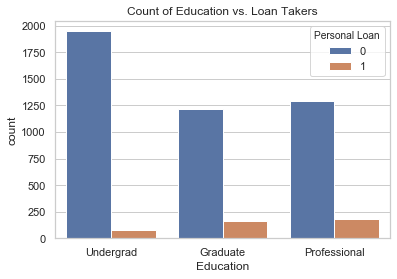

Crosstab of Education 
 Personal Loan     0    1
Education               
Graduate       1218  166
Professional   1295  185
Undergrad      1949   82

Crosstab % 
 Personal Loan         0         1
Education                        
Graduate       0.880058  0.119942
Professional   0.875000  0.125000
Undergrad      0.959626  0.040374




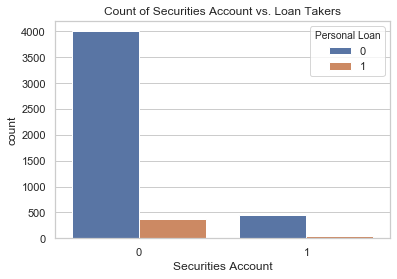

Crosstab of Securities Account 
 Personal Loan          0    1
Securities Account           
0                   4005  379
1                    457   54

Crosstab % 
 Personal Loan              0         1
Securities Account                    
0                   0.913549  0.086451
1                   0.894325  0.105675




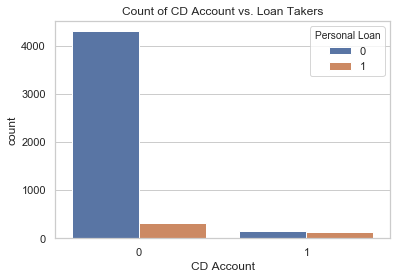

Crosstab of CD Account 
 Personal Loan     0    1
CD Account              
0              4301  312
1               161  121

Crosstab % 
 Personal Loan         0         1
CD Account                       
0              0.932365  0.067635
1              0.570922  0.429078




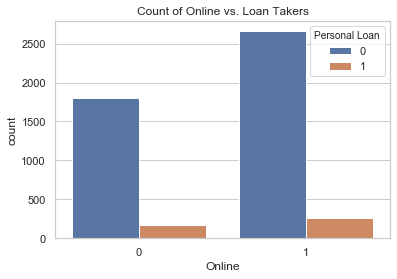

Crosstab of Online 
 Personal Loan     0    1
Online                  
0              1803  172
1              2659  261

Crosstab % 
 Personal Loan         0         1
Online                           
0              0.912911  0.087089
1              0.910616  0.089384




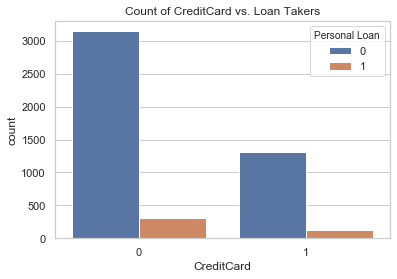

Crosstab of CreditCard 
 Personal Loan     0    1
CreditCard              
0              3145  307
1              1317  126

Crosstab % 
 Personal Loan         0         1
CreditCard                       
0              0.911066  0.088934
1              0.912682  0.087318




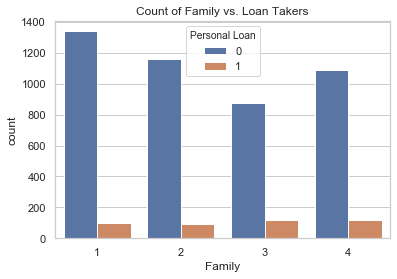

Crosstab of Family 
 Personal Loan     0    1
Family                  
1              1340  100
2              1161   94
3               874  120
4              1087  119

Crosstab % 
 Personal Loan         0         1
Family                           
1              0.930556  0.069444
2              0.925100  0.074900
3              0.879276  0.120724
4              0.901327  0.098673




In [16]:
cat_cols = ['Education','Securities Account','CD Account','Online','CreditCard','Family']
for i in cat_cols:
    ax = plt.subplot()
    sns.countplot(x = i, hue = 'Personal Loan', data = mod_df)
    plt.title(f'Count of {i} vs. Loan Takers')
    ax.set(xlabel = i)
    plt.show()
    pivot = pd.crosstab(mod_df[i],mod_df['Personal Loan'])
    print(f'Crosstab of {i} \n', pivot)
    print(f'\nCrosstab % \n', pivot.div(pivot.sum(1).astype(float), axis=0))
    print('\n')

### Inferences

1. Professionals & Graduates (higher educated) have higher chances of taking loan
2. Customers with CD account have significantly higher chances of taking loan
3. Online users, loan takers & securities account holders have equal chances of taking loan vs. their counterparts
4. Larger families have higher chance of taking loan

In [17]:
mod_df['ZIP Code'].min(), mod_df['ZIP Code'].max()

(9307, 96651)

(0, 200)

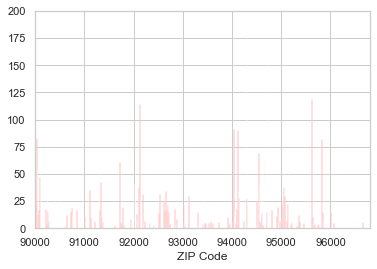

In [18]:
sns.distplot(mod_df['ZIP Code'], bins = 10000, kde = False, color = 'Red')
plt.xlim(90000,96800)
plt.ylim(0,200)
#mod_df.groupby('ZIP Code').size().reset_index(name='Counts')

In [19]:
mod_df['ZIP Code'].corr(mod_df['Personal Loan'])

-0.0005006389351961193

In [20]:
# Dropping ZIP Code from the data frame as that is an ID, is well spread and has no correlation with Loan takers
mod_df.drop('ZIP Code', axis = 1, inplace = True)
mod_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8,45,4,1.0,Graduate,0,0,0,0,0,1


In [21]:
age_exp = mod_df['Age'].corr(mod_df['Experience'])
age_loan = mod_df['Age'].corr(mod_df['Personal Loan'])
exp_loan = mod_df['Experience'].corr(mod_df['Personal Loan'])


print(f'Correlation between age and experience : {age_exp}')
print(f'Correlation between age and personal loan : {age_loan}')    
print(f'Correlation between experience and personal loan : {exp_loan}')          

Correlation between age and experience : 0.9941956961588866
Correlation between age and personal loan : -0.010251863499555007
Correlation between experience and personal loan : -0.010126056833686075


In [22]:
#Dropping experience from the table as that is highly correlated with age and has low correlation with personal loan takers
final_df = mod_df
final_df.drop('Experience', axis = 1, inplace = True)
final_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,45,4,1.0,Graduate,0,0,0,0,0,1


In [23]:
#One hot encoding for Education & Family categorical Attributes
final_df = pd.get_dummies(final_df, columns = ['Education', 'Family'])
final_df.head()

,Age,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Professional,Education_Undergrad,Family_1,Family_2,Family_3,Family_4
0,25,49,1.6,0,0,1,0,0,0,0,0,1,0,0,0,1
1,45,34,1.5,0,0,1,0,0,0,0,0,1,0,0,1,0
2,39,11,1.0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,35,100,2.7,0,0,0,0,0,0,1,0,0,1,0,0,0
4,35,45,1.0,0,0,0,0,0,1,1,0,0,0,0,0,1


# 4. Split the data into training and test set in the ratio of 70:30 respectively

In [24]:
x_cols = ['Age','Income','Family_1','Family_2','Family_3','Family_4','Mortgage','Securities Account','CD Account','Online','CreditCard','Education_Graduate','Education_Professional','Education_Undergrad']
X = final_df[x_cols]
y = final_df['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3426, 14), (1469, 14), (3426,), (1469,))

# 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans

Considering this is an unbalanced data set & 
it is prediction model for marketing campaign  
so benefits of True positives would matter more 
than cost of false positives, 
hence considering precision for nearest neighbor count identification

Max precision score 0.658 for neighbor count = 6



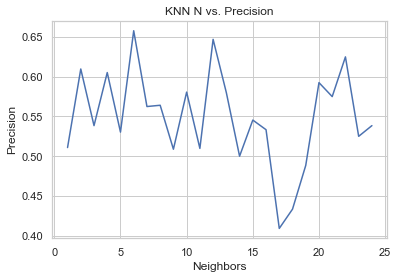

In [27]:
from sklearn import metrics

#Logistic Regression
logreg = LogisticRegression().fit(X_train,y_train.ravel())
logreg_pred = logreg.predict(X_test)

#Naive Bayes
GNB = GaussianNB().fit(X_train,y_train.ravel())
GNB_pred = GNB.predict(X_test)

#KNN
print('''Considering this is an unbalanced data set & 
it is prediction model for marketing campaign  
so benefits of True positives would matter more 
than cost of false positives, 
hence considering precision for nearest neighbor count identification\n''')

kscores = []

for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train.ravel())
    knn_pred = knn.predict(X_test)
    knn_acc = metrics.precision_score(y_test, knn_pred)
    kscores.append(knn_acc)

print(f'Max precision score {round(max(kscores),3)} for neighbor count = {kscores.index(max(kscores))+1}\n')

plt.plot(range(1,25),kscores)
plt.xlabel('Neighbors')
plt.ylabel('Precision')
plt.title('KNN N vs. Precision')

KNN = KNeighborsClassifier(n_neighbors = kscores.index(max(kscores))+1).fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)


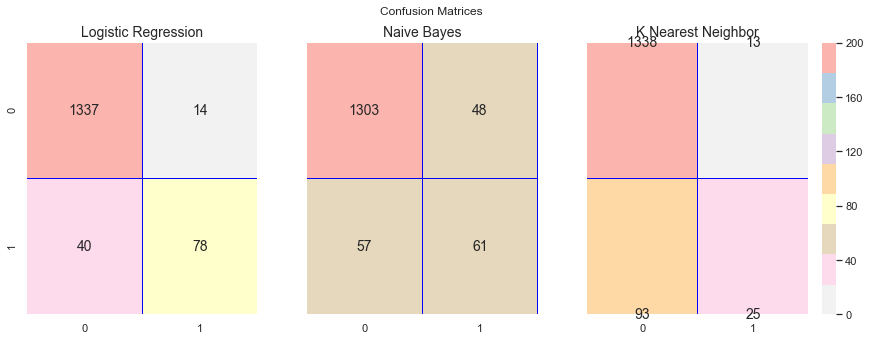

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, gridspec_kw={'width_ratios':[1,1,1.2]}, figsize=(15,5), sharey = True)
fig.suptitle('Confusion Matrices')

ax[0].set_title('Logistic Regression', fontsize = 14)
df_lr = pd.DataFrame(metrics.confusion_matrix(y_test,logreg_pred))
sns.heatmap(df_lr, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = False, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 200, ax=ax[0])


ax[1].set_title('Naive Bayes', fontsize = 14)
df_GNB = pd.DataFrame(metrics.confusion_matrix(y_test,GNB_pred))
sns.heatmap(df_GNB, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = False, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 200, ax = ax[1])


ax[2].set_title('K Nearest Neighbor', fontsize = 14)
df_KNN = pd.DataFrame(metrics.confusion_matrix(y_test,KNN_pred))
sns.heatmap(df_KNN, cmap="Pastel1_r", annot=True,annot_kws={"size": 14}, fmt = 'd', cbar = True, linewidths = 0.1, linecolor = 'Blue',vmin = 0, vmax = 200, ax = ax[2])


In [28]:
# printing the scores
scores = {'Model' : ['Logistic Regression', 'Naive Bayes', 'Nearest Neighors'],
         'Accuracy' : [round(metrics.accuracy_score(y_test, logreg_pred),3),round(metrics.accuracy_score(y_test, GNB_pred),3),round(metrics.accuracy_score(y_test, KNN_pred),3)],
         'Precision' : [round(metrics.precision_score(y_test, logreg_pred),3),round(metrics.precision_score(y_test, GNB_pred),3),round(metrics.precision_score(y_test, KNN_pred),3)],
         'Recall' : [round(metrics.recall_score(y_test, logreg_pred),3),round(metrics.recall_score(y_test, GNB_pred),3),round(metrics.recall_score(y_test, KNN_pred),3)],
         'F1' : [round(metrics.f1_score(y_test, logreg_pred),3),round(metrics.f1_score(y_test, GNB_pred),3),round(metrics.f1_score(y_test, KNN_pred),3)]}


scores_df = pd.DataFrame(scores,columns = ['Model','Accuracy','Precision','Recall','F1'])

print(scores_df)

                 Model  Accuracy  Precision  Recall     F1
0  Logistic Regression     0.963      0.848   0.661  0.743
1          Naive Bayes     0.929      0.560   0.517  0.537
2     Nearest Neighors     0.928      0.658   0.212  0.321


### Best model : Logistic regression
#### It has the highest scores all across so I would pick this